In [7]:
import warnings
warnings.filterwarnings("ignore")
from sklearn.datasets import load_boston
from random import seed
from random import randrange
from csv import reader
from math import sqrt
from sklearn import preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn import preprocessing
from sklearn.metrics import mean_squared_error

In [8]:
X = load_boston().data
Y = load_boston().target

In [12]:
from sklearn import cross_validation
X_1, X_test, y_1, y_test = cross_validation.train_test_split(X,Y, test_size=0.2, random_state=0)

### Normalizing our data

In [19]:
mean = np.mean(X_1)
std_deviation = np.std(X_1)
print(mean,std_deviation)
X_1 = (X_1-mean)/std_deviation
print(np.mean(X_1),np.std(X_1))
mean = np.mean(y_1)
std_deviation = np.std(y_1)
y_1 = (y_1-mean)/std_deviation

-1.4881892790101107e-17 1.0
-1.4205443117823786e-17 1.0


In [20]:
mean = np.mean(X_test)
std_deviation = np.std(X_test)
print(mean,std_deviation)
X_test = (X_test-mean)/std_deviation
print(np.mean(X_test),np.std(X_test))
mean = np.mean(y_test)
std_deviation = np.std(y_test)
y_test = (y_test-mean)/std_deviation

-0.004276416700430347 1.0101782281477452
-5.35854250196154e-18 0.9999999999999999


In [21]:
### Initializing weights
W = np.ones(13)
B = 0.5
def Hypo(x,w,b):
    h=0# Hypothesis
    for i in range(13):
        h+= x[i]*w[i]
    return h+b
def error(x,y,w,b):
    m=x.shape[0]
    error = 0
    for i in range(m):
        hypo = Hypo(x[i],w,b)
        error+= (y[i] - hypo)**2
    return error/(2*m)
def batchgradient(x,y,w,b):
    m=x.shape[0]
    grad = np.zeros((x.shape[1]))
    for i in range(m):
        hx=Hypo(x[i],w,b)
        b+=(y[i]-hx)
        for j in range(x.shape[1]):
            grad[j]+=(y[i]-hx)*x[i][j]
    return (grad/m,b/m)
def SGD(x,y,w,b,epochs = 500,batch_size=30):
    error_list = []
    lr=0.2
    for i in range(30):
        itr= 0 
        indices=np.arange(x.shape[0])
        np.random.shuffle(indices)
        indices=indices[:batch_size]
        datax = []
        datay = []
        for i in indices:
            datax.append(x[i])
            datay.append(y[i])
        datax = np.asarray(datax)
        datay = np.asarray(datay)
        while(itr<epochs):
            grad = batchgradient(datax,datay,w,b)
            b = b + lr*grad[1]
            for i in range(x.shape[1]):
                w[i] = w[i] +lr*grad[0][i]
            itr+=1
        e = error(x,y,w,b)
        error_list.append(e)
        lr/=2
    return (w,error_list,b)
    
    


In [22]:
model = SGD(X_1,y_1,W,B)
final_weights = model[0]
error_lst = model[1]
intercept = model[2]

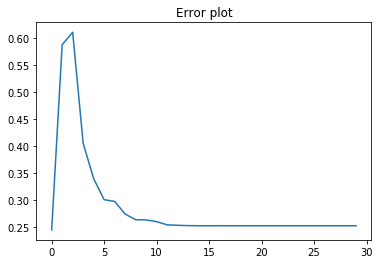

In [23]:
plt.plot(error_lst)
plt.title("Error plot")
plt.show()

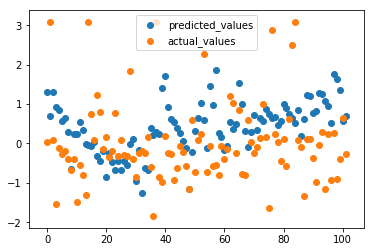

In [32]:
## Plot between actual values and predicted values
predicted_values = []
for i in range(X_test.shape[0]):
    predicted_values.append(Hypo(X[i],W,B))
plt.scatter(xx,predicted_values,label="predicted_values")
plt.scatter(xx,y_test,label="actual_values")
plt.legend()
plt.show()

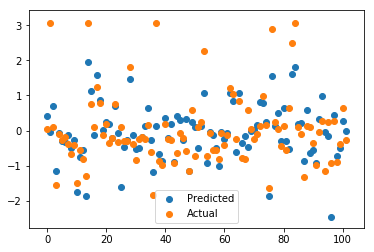

In [33]:
model = SGDRegressor()
model.fit(X_1,y_1)
predicted = model.predict(X_test)
plt.scatter(xx,predicted,label='Predicted')
plt.scatter(xx,y_test,label='Actual')
plt.legend()
plt.show()

In [29]:
xx =[]
for i in range(102):
    xx.append(i)


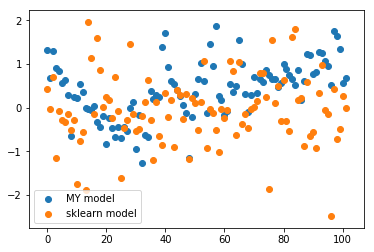

In [34]:
# comparison of yhat of my model vs sklearn model
plt.scatter(xx,predicted_values,label='MY model')
plt.scatter(xx,predicted,label='sklearn model')
plt.legend()
plt.show()

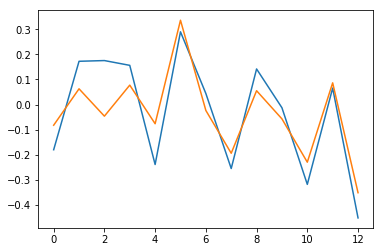

In [26]:
## Comparison of weights obtained from my model and sklearn model
weights = model.coef_
intr = model.intercept_
plt.plot(final_weights)
plt.plot(weights)
plt.show()

In [32]:
# comparison of weights in tabular form 
from prettytable import PrettyTable
x = PrettyTable()
x.field_names = ["Feature_NO","Weights of my model","Weights of sklearn model"]
for i in range(13):
    x.add_row([i+1,final_weights[i],weights[i]])
x.add_row(["ntercept",intercept,intr])
print(x)


+------------+-----------------------+--------------------------+
| Feature_NO |  Weights of my model  | Weights of sklearn model |
+------------+-----------------------+--------------------------+
|     1      |  -0.2794313670528305  |   -0.09154809503621156   |
|     2      |   0.2001721666064239  |   0.06435292176784682    |
|     3      |  0.03702774454390875  |   -0.04784921635546487   |
|     4      |  0.003502581764616164 |   0.08328628643838945    |
|     5      |  -0.23525065343195842 |   -0.08459517249338033   |
|     6      |  0.30492012350203174  |    0.3325248671754027    |
|     7      | -0.023574587816422292 |  -0.023601602611922217   |
|     8      |  -0.45545432309919476 |   -0.19740575132540028   |
|     9      |   0.4274729511288738  |   0.05521287367008644    |
|     10     |  -0.40045694629761464 |   -0.06173557404060522   |
|     11     |  -0.22638990142612223 |   -0.22602284912554016   |
|     12     |  0.14317589286951368  |   0.09016054573446744    |
|     13  

In [33]:
## comparing mean sqared error of both the models
msi_my_model = error(X_1,y_1,final_weights,intercept)
msi_sklearn_model = error(X_1,y_1,weights,intr)
print(msi_my_model,msi_sklearn_model)

0.18534622987099322 [0.11904696]
